# CDC Diabetes Health Indicators

## Problem Statement
Diabetes is a growing health concern worldwide, with significant implications for public health systems. In Kenya, the prevalence of diabetes is increasing, particularly in urban areas. There is a need to understand the relationship between lifestyle factors and diabetes to develop effective interventions. This project aims to analyze the CDC Diabetes Health Indicators Dataset to identify key risk factors for diabetes and provide actionable insights to improve diabetes care and prevention in Kenya.

## Business Understanding
The primary objective of this project is to better understand the relationship between lifestyle and diabetes in the US using the CDC Diabetes Health Indicators Dataset. This topic is of particular interest due to the rising prevalence of diabetes in Kenya, especially in urban areas. By studying this data, we aim to create awareness about diabetes and develop interventions to reduce the prevalence of risk factors for kidney failure and improve diabetes care in Kenya. This project applies to the Health and Medicine domain and targets the Ministry of Health, teaching institutions, Non-Governmental Organizations, the private sector, and teaching hospitals in Kenya. If successful, this analysis could significantly impact by raising awareness and guiding interventions to improve diabetes care and reduce related health risks.

## Data Understanding and Cleaning
We will collect data on diabetes diagnosis, demographics (race, sex), personal information (income, education), and health history (drinking, smoking, mental health, physical health). The raw data is sourced from [Kaggle's Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and is available for download and public use. The features include integer and binary variables, and the dataset does not contain missing values. We will handle data preprocessing tasks such as encoding categorical variables and scaling numerical features while addressing data privacy and managing any inconsistent data.


In [40]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv.xls'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
 0                   0.0           0.0     0.0      1.0                0.0   
 1                   0.0           1.0     0.0      0.0                0.0   
 2                   0.0           0.0     1.0      0.0                0.0   
 3                   0.0           1.0     1.0      1.0                0.0   
 4                   0.0           1.0     1.0      1.0                0.0   
 
    AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
 0            1.0       

In [41]:
# DATA CLEANING
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

23899

The data contains duplicate entries which, we have chosen not to remove since doing so could skew the dataset's distribution or fail to account for variations that are necessary for model robustness.

In [42]:
pd.set_option('display.max_columns', None)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [43]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


The dataset now has 229,781 rows and 22 columns after removing duplicates. All columns are of type float64, which is appropriate for the numerical variables in this dataset.

In [44]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'Diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


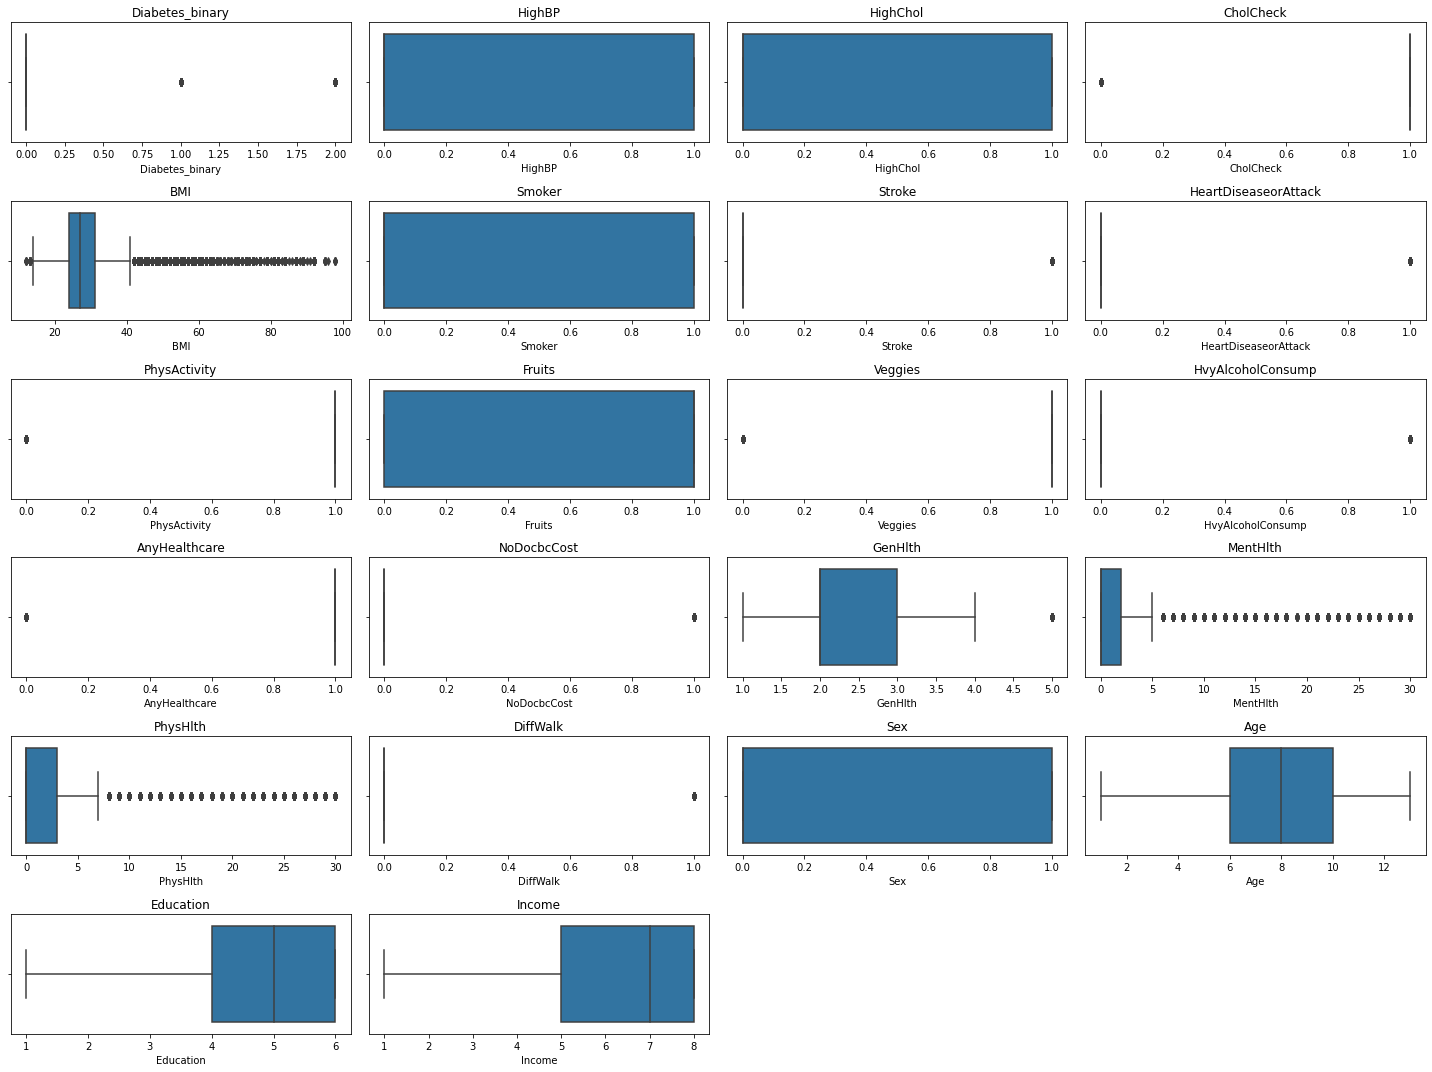

In [45]:
#Identifying Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [46]:
## HANDLING OUTLIERS

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Handle outliers for the identified variables
outlier_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']
for col in outlier_columns:
    data = handle_outliers(data, col)

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000,165919.000000
mean,0.219601,0.377516,0.386960,0.959812,27.271639,0.407120,0.024994,0.065225,0.813156,0.655826,0.829146,0.057257,0.955882,0.050278,2.157426,0.458085,0.206577,0.067045,0.470452,8.006714,5.148464,6.422007
std,0.613166,0.484767,0.487056,0.196401,4.747831,0.491299,0.156108,0.246922,0.389788,0.475100,0.376383,0.232333,0.205358,0.218518,0.847743,1.164923,0.557544,0.250100,0.499128,3.072253,0.946940,1.858325
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [47]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,165919.0,0.219601,0.613166,0.0,0.0,0.0,0.0,2.0
HighBP,165919.0,0.377516,0.484767,0.0,0.0,0.0,1.0,1.0
HighChol,165919.0,0.386960,0.487056,0.0,0.0,0.0,1.0,1.0
CholCheck,165919.0,0.959812,0.196401,0.0,1.0,1.0,1.0,1.0
BMI,165919.0,27.271639,4.747831,14.0,24.0,27.0,30.0,41.0
Smoker,165919.0,0.407120,0.491299,0.0,0.0,0.0,1.0,1.0
Stroke,165919.0,0.024994,0.156108,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,165919.0,0.065225,0.246922,0.0,0.0,0.0,0.0,1.0
PhysActivity,165919.0,0.813156,0.389788,0.0,1.0,1.0,1.0,1.0
Fruits,165919.0,0.655826,0.475100,0.0,0.0,1.0,1.0,1.0


In [48]:
diabetes_distribution = data['Diabetes_binary'].value_counts()

diabetes_distribution

0.0    146456
2.0     16973
1.0      2490
Name: Diabetes_binary, dtype: int64

This distribution indicates that the dataset is imbalanced, with a significantly larger proportion of non-diabetic individuals compared to prediabetic and diabetic ones.

No Diabetes (0): 146,456 occurrences (85.11%)

Pre-diabetic (1) and Diabetic (2): 19,463 occurrences (14.89%)

The categories Pre-diabetic (1) and Diabetic (2) together make up a smaller portion of the dataset compared to those with no diabetes. This imbalance needs to be taken into consideration when developing predictive models, as it can affect model performance.

### Variables Table

This dataset is from the UCI Machine Learning Repository and contains health indicators related to diabetes, collected through a questionnaire given to participants. Below is a detailed description of the data:

| Variable Name          | Role    | Type     | Description                                                                                                             | Units      | Missing Values |
|------------------------|---------|----------|------------------------------------------------------------------------------------------------------------------------|------------|----------------|
| **ID**                 | ID      | Integer  | Patient ID                                                                                                             | -          | no             |
| **Diabetes_binary**    | Target  | Binary   | 0 = no diabetes, 1 = prediabetes or diabetes                                                                           | -          | no             |
| **HighBP**             | Feature | Binary   | 0 = no high BP, 1 = high BP                                                                                            | -          | no             |
| **HighChol**           | Feature | Binary   | 0 = no high cholesterol, 1 = high cholesterol                                                                          | -          | no             |
| **CholCheck**          | Feature | Binary   | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                              | -          | no             |
| **BMI**                | Feature | Integer  | Body Mass Index                                                                                                        | -          | no             |
| **Smoker**             | Feature | Binary   | Have you smoked at least 100 cigarettes in your entire life? (5 packs = 100 cigarettes) 0 = no, 1 = yes                | -          | no             |
| **Stroke**             | Feature | Binary   | (Ever told) you had a stroke. 0 = no, 1 = yes                                                                          | -          | no             |
| **HeartDiseaseorAttack** | Feature | Binary | Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes                                            | -          | no             |
| **PhysActivity**       | Feature | Binary   | Physical activity in past 30 days - not including job. 0 = no, 1 = yes                                                 | -          | no             |
| **Fruits**             | Feature | Binary   | Consume fruit 1 or more times per day. 0 = no, 1 = yes                                                                 | -          | no             |
| **Veggies**            | Feature | Binary   | Consume vegetables 1 or more times per day. 0 = no, 1 = yes                                                            | -          | no             |
| **HvyAlcoholConsump**  | Feature | Binary   | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes | -    | no             |
| **AnyHealthcare**      | Feature | Binary   | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes     | -          | no             |
| **NoDocbcCost**        | Feature | Binary   | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes  | -          | no             |
| **GenHlth**            | Feature | Integer  | Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)   | -          | no             |
| **MentHlth**           | Feature | Integer  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days | -          | no             |
| **PhysHlth**           | Feature | Integer  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days | -          | no             |
| **DiffWalk**           | Feature | Binary   | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes                                             | -          | no             |
| **Sex**                | Feature | Binary   | Sex. 0 = female, 1 = male                                                                                              | -          | no             |
| **Age**                | Feature | Integer  | Age (13-level age category, see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older                                      | -          | no             |
| **Education**          | Feature | Integer  | Education level (EDUCA, see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years) | -          | no             |
| **Income**             | Feature | Integer  | Income scale (INCOME2, see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)    | -          | no             |

---

### Key Variables
1. **BMI (Body Mass Index)**:
   - **Importance**: A well-known risk factor for diabetes, higher BMI indicates overweight or obesity, which is strongly associated with diabetes.

2. **HighBP (High Blood Pressure)**:
   - **Importance**: High blood pressure is often found in individuals with diabetes and can be a significant predictor.

3. **HighChol (High Cholesterol)**:
   - **Importance**: High cholesterol levels are another risk factor for diabetes and related cardiovascular diseases.

4. **PhysActivity (Physical Activity)**:
   - **Importance**: Regular physical activity is known to reduce the risk of diabetes. Lack of physical activity can be a significant risk factor.

5. **Smoker**:
   - **Importance**: Smoking is associated with various health issues, including increased risk of diabetes.

6. **GenHlth (General Health)**:
   - **Importance**: General health status can provide insights into overall health and well-being, which can be correlated with diabetes risk.

7. **MentHlth (Mental Health)**:
   - **Importance**: Mental health issues can indirectly affect diabetes risk through lifestyle choices and stress-related factors.

8. **PhysHlth (Physical Health)**:
   - **Importance**: Similar to general health, physical health status can indicate the presence of other conditions that may influence diabetes risk.

9. **Age**:
   - **Importance**: Age is a non-modifiable risk factor for diabetes, with prevalence increasing with age.

10. **Sex**:
    - **Importance**: Understanding differences in diabetes prevalence and risk between males and females can be crucial for targeted interventions.

11. **Education**:
    - **Importance**: Education level can influence health literacy and lifestyle choices, impacting diabetes risk.

12. **Income**:
    - **Importance**: Income level can affect access to healthcare, healthy food options, and overall lifestyle, impacting diabetes risk.
